## 1.0  Analysis of Applications Train and Test Datasets
> - In this notebook I analyze and summarize the `application_train` and `application_test` datasets' continuous or `float64`types.
> The datasets have three types: `float64`, `int64`, and `object`.The `int64` and `object` types are analyzed in a different notebook.

> - To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The `application_train`and `application_test` datasets includes all the same fields except the target variable.


> - The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations.  After reviewing these statistics and data visualizations I will decide which fields should be included as features.  I also perform transformations on fields as deemed necessary. 

#### Analysis Summary:
> - Fields with missing rate higher than 10% were removed with some exceptions.
> - Fields with missing rate less than 10% were filled with the median.
> - Highly correlated fields were removed.  
> - Some fields were transformed to increase normality.
> - Some fields were converted to categorical features.
> - After analyzing the 70 continuous fields 20 (including derived features) were selected as features.

In [1]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import mean_squared_error

import math
from scipy import stats
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Import Datasets And Prepare ABT
> - Import the train and test datasets combined using a utility helper module.
> - Create Activity Base Table (ABT) to group the fields by type.

In [3]:
dataset_all = utils.get_application_df()
dataset_all.dtypes.value_counts()

float64    71
int64      35
object     17
dtype: int64

In [4]:
abt_all = utils.ABT(dataset_all)
abt_all.info()

Column count: 123
--------------------
Row count: 356255
--------------------
Types:
--------------------
Type: float64 Count: 71
Type: int64 Count: 35
Type: object Count: 17


In [5]:
float_table = abt_all.float_table
print("Total float64 types: {}".format(len(float_table)))
float_table 

Total float64 types: 70


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,1,"356,255.00",0.00,0.00,0.41,0.72,0.00,0.00,0.00,1.00,20.00
AMT_INCOME_TOTAL,2,"356,255.00",0.00,0.00,"170,116.06","223,506.82","25,650.00","112,500.00","153,000.00","202,500.00","117,000,000.00"
AMT_CREDIT,3,"356,255.00",0.00,0.00,"587,767.41","398,623.69","45,000.00","270,000.00","500,211.00","797,557.50","4,050,000.00"
AMT_ANNUITY,4,"356,219.00",36.00,0.00,"27,425.56","14,732.81","1,615.50","16,731.00","25,078.50","34,960.50","258,025.50"
AMT_GOODS_PRICE,5,"355,977.00",278.00,0.00,"528,020.00","366,064.99","40,500.00","234,000.00","450,000.00","675,000.00","4,050,000.00"
REGION_POPULATION_RELATIVE,6,"356,255.00",0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,7,"356,255.00",0.00,0.00,"-16,041.25","4,358.80","-25,229.00","-19,676.00","-15,755.00","-12,425.00","-7,338.00"
DAYS_EMPLOYED,8,"356,255.00",0.00,0.00,"64,317.23","141,705.53","-17,912.00","-2,781.00","-1,224.00",-290.00,"365,243.00"
DAYS_REGISTRATION,9,"356,255.00",0.00,0.00,"-4,983.59","3,526.97","-24,672.00","-7,477.00","-4,502.00","-1,995.00",0.00
DAYS_ID_PUBLISH,10,"356,255.00",0.00,0.00,"-3,002.07","1,517.90","-7,197.00","-4,318.00","-3,252.00","-1,717.00",0.00


### 1.2 Analyze Missing Values
> - I use a [missingno correlation heatmap](https://github.com/ResidentMario/missingno) to measures nullity correlation or how strongly the presence or absence of one variable affects the presence of another.
> - Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

#### Observations:
> - The housings fields have high nullity correlation with each other.
> - Credit bureau fields are perfectly nullity correlated with each other.
> - Social circle fields are perfectly nullity correlated with each other.
> - Credit bureau fields have high nullity correlation with the `EXT_SOURCE_3` field.

#### Conclusion:
> - Remove any fields that have missing values percentage higher than 10% with exception of the `EXT_SOURCE_1` and `EXT_SOURCE_3`. The `EXT_SOURCE_1` and `EXT_SOURCE_3` are domain knowledge fields.  
> - Fill the fields with a missing percentange less than 10% with median value from the __TRAINING__ set after removing any outliers.
> - I will fill in the missing values for the `EXT_SOURCE_1` and `EXT_SOURCE_3` fields using prediction.


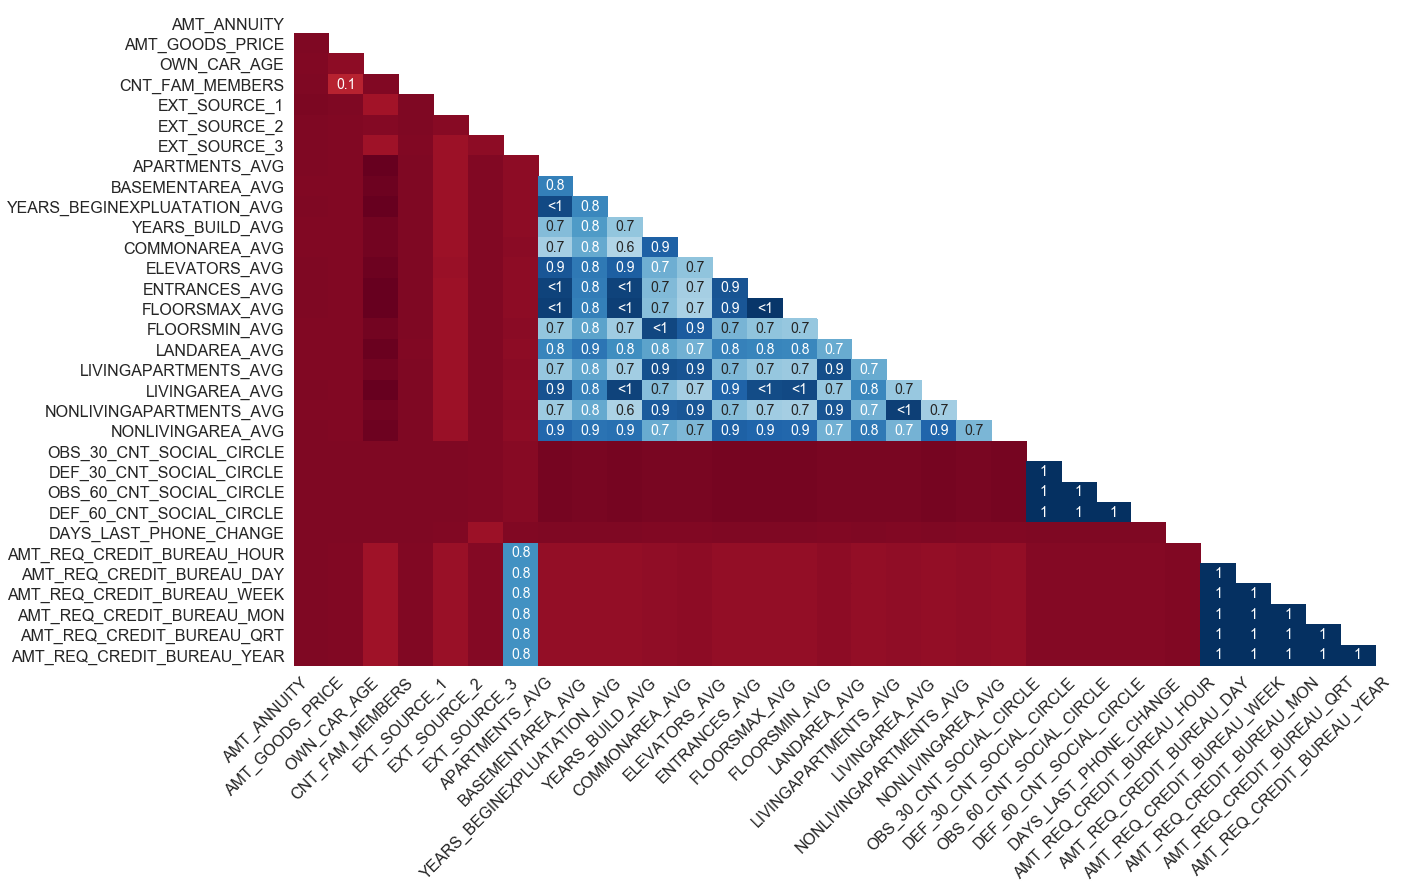

In [6]:
#get fields that have missing data
missing_float = float_table[float_table['na_%'] > 0.0].index.values.tolist()

#exclude mode and median housing fields
# the logic is that if housing field average is missing so is the mode and medien 
adj_missing_float = []
for f in missing_float:
    mode =  'MODE' in f
    medi =  'MEDI' in f
    found = mode or medi
    
    if not found:
        adj_missing_float.append(f)
        
msno.heatmap(dataset_all[adj_missing_float])
plt.show()

### 1.3 Filter Out Fields With High Missing Values

In [7]:
# include the `EXT_SOURCE_1` and `EXT_SOURCE_3`
float_table_filter = abt_all.float_table_nan_filter(0.10,['EXT_SOURCE_1','EXT_SOURCE_3']) 
float_table_filter

,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,1,"356,255.00",0.00,0.00,0.41,0.72,0.00,0.00,0.00,1.00,20.00
AMT_INCOME_TOTAL,2,"356,255.00",0.00,0.00,"170,116.06","223,506.82","25,650.00","112,500.00","153,000.00","202,500.00","117,000,000.00"
AMT_CREDIT,3,"356,255.00",0.00,0.00,"587,767.41","398,623.69","45,000.00","270,000.00","500,211.00","797,557.50","4,050,000.00"
AMT_ANNUITY,4,"356,219.00",36.00,0.00,"27,425.56","14,732.81","1,615.50","16,731.00","25,078.50","34,960.50","258,025.50"
AMT_GOODS_PRICE,5,"355,977.00",278.00,0.00,"528,020.00","366,064.99","40,500.00","234,000.00","450,000.00","675,000.00","4,050,000.00"
REGION_POPULATION_RELATIVE,6,"356,255.00",0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,7,"356,255.00",0.00,0.00,"-16,041.25","4,358.80","-25,229.00","-19,676.00","-15,755.00","-12,425.00","-7,338.00"
DAYS_EMPLOYED,8,"356,255.00",0.00,0.00,"64,317.23","141,705.53","-17,912.00","-2,781.00","-1,224.00",-290.00,"365,243.00"
DAYS_REGISTRATION,9,"356,255.00",0.00,0.00,"-4,983.59","3,526.97","-24,672.00","-7,477.00","-4,502.00","-1,995.00",0.00
DAYS_ID_PUBLISH,10,"356,255.00",0.00,0.00,"-3,002.07","1,517.90","-7,197.00","-4,318.00","-3,252.00","-1,717.00",0.00


In [8]:
# print description of each field after removing fields with high null values
field_table = utils.FieldsNames()
field_table.print('application_{train|test}.csv',float_table_filter.index.values.tolist()) 

1) ['CNT_CHILDREN']: Number of children the client has
----------------------------------------
2) ['AMT_INCOME_TOTAL']: Income of the client
----------------------------------------
3) ['AMT_CREDIT']: Credit amount of the loan
----------------------------------------
4) ['AMT_ANNUITY']: Loan annuity
----------------------------------------
5) ['AMT_GOODS_PRICE']: For consumer loans it is the price of the goods for which the loan is given
----------------------------------------
6) ['REGION_POPULATION_RELATIVE']: Normalized population of region where client lives (higher number means the client lives in more populated region)
----------------------------------------
7) ['DAYS_BIRTH']: Client's age in days at the time of application
----------------------------------------
8) ['DAYS_EMPLOYED']: How many days before the application the person started current employment
----------------------------------------
9) ['DAYS_REGISTRATION']: How many days before the application did client chang

### 1.4  Add Domain Knowledge Features
> Courtesy of this [link](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features) I add some domain knowledge features

> - `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
> - `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
> - `CREDIT_TERM`: the length of the payment in months (since the annuity is the monthly amount due
> - `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

In [9]:
dataset_all['CREDIT_INCOME_PERCENT'] = dataset_all['AMT_CREDIT'] / dataset_all['AMT_INCOME_TOTAL']
dataset_all['ANNUITY_INCOME_PERCENT'] = dataset_all['AMT_ANNUITY'] / dataset_all['AMT_INCOME_TOTAL']
dataset_all['CREDIT_TERM'] = dataset_all['AMT_ANNUITY'] / dataset_all['AMT_CREDIT']
dataset_all['DAYS_EMPLOYED_PERCENT'] = dataset_all['DAYS_EMPLOYED'].apply(lambda x: 0 if x==365243.00 else x) / dataset_all['DAYS_BIRTH']
domain_fields = ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']

### 1.5 Prepare Correlation Heatmap
> To visualize any correlations between our feature fields

#### Observations:
> - The fields  `CNT_CHILDREN` and `CNT_FAM_MEMBERS` have a high correlation.
> - The fields  `AMT_GOODS_PRICE` and `AMT_CREDIT` are perfectly correlated.
> - The fields  `AMT_GOODS_PRICE` has a high correlation with `AMT_ANNUITY`.
> - The fields  `AMT_ANNUITY` and `AMT_CREDIT` have a high correlation.
> - The fields  `CNT_CHILDREN` and `CNT_FAM_MEMBERS` have a high correlation.
> - The fields  `OBS_30_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` are perfectly correlated.
> - The fields  `DEF_30_CNT_SOCIAL_CIRCLE` and `DEF_60_CNT_SOCIAL_CIRCLE` have a high correlation.


#### Conclusion:
> Remove `AMT_GOODS_PRICE`, `CNT_CHILDREN`, `OBS_30_CNT_SOCIAL_CIRCLE` and `DEF_30_CNT_SOCIAL_CIRCLE` as featuare fields since these fields are highly correlated with another and will provide minimal value to our model.

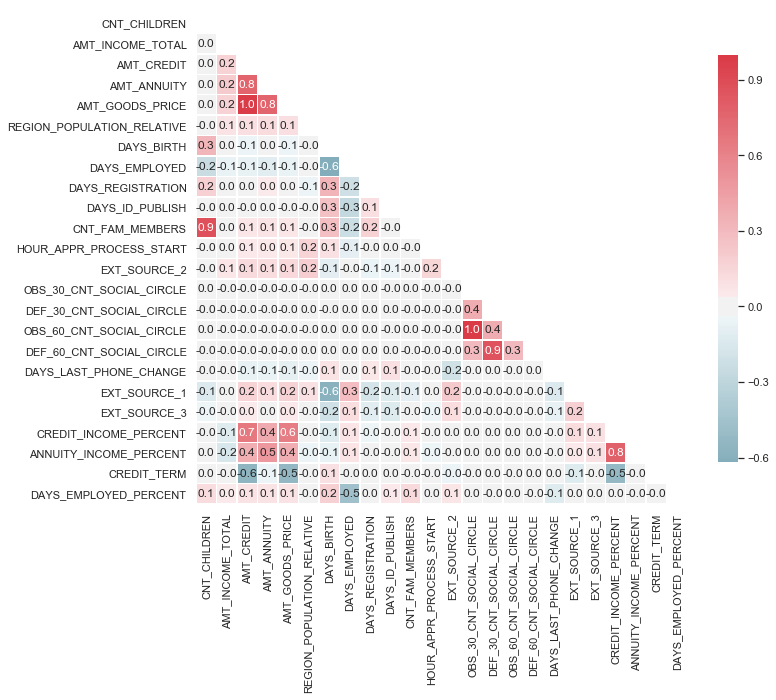

In [10]:
sns.set(style="white")

# Compute the correlation matrix
corr_fields = float_table_filter.index.values.tolist() + domain_fields
corr = dataset_all[corr_fields].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True,  linewidths=.5, cbar_kws={"shrink": .5},fmt='.1f'   )

plt.show()

### 1.6  Exclude Highly Correlated Features

In [11]:
#fields we want to exclude
excluded = ['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

adjusted_float_list = np.setdiff1d(float_table_filter.index,excluded,assume_unique=True)

float_table_adjusted = abt_all.get_float_table(adjusted_float_list)
print("\nTotal adjusted float64 types: {}".format(len(float_table_adjusted)))
float_table_adjusted


Total adjusted float64 types: 16


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,2,"356,255.00",0.00,0.00,"170,116.06","223,506.82","25,650.00","112,500.00","153,000.00","202,500.00","117,000,000.00"
AMT_CREDIT,3,"356,255.00",0.00,0.00,"587,767.41","398,623.69","45,000.00","270,000.00","500,211.00","797,557.50","4,050,000.00"
AMT_ANNUITY,4,"356,219.00",36.00,0.00,"27,425.56","14,732.81","1,615.50","16,731.00","25,078.50","34,960.50","258,025.50"
REGION_POPULATION_RELATIVE,6,"356,255.00",0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,7,"356,255.00",0.00,0.00,"-16,041.25","4,358.80","-25,229.00","-19,676.00","-15,755.00","-12,425.00","-7,338.00"
DAYS_EMPLOYED,8,"356,255.00",0.00,0.00,"64,317.23","141,705.53","-17,912.00","-2,781.00","-1,224.00",-290.00,"365,243.00"
DAYS_REGISTRATION,9,"356,255.00",0.00,0.00,"-4,983.59","3,526.97","-24,672.00","-7,477.00","-4,502.00","-1,995.00",0.00
DAYS_ID_PUBLISH,10,"356,255.00",0.00,0.00,"-3,002.07","1,517.90","-7,197.00","-4,318.00","-3,252.00","-1,717.00",0.00
CNT_FAM_MEMBERS,12,"356,253.00",2.00,0.00,2.15,0.91,1.00,2.00,2.00,3.00,21.00
HOUR_APPR_PROCESS_START,13,"356,255.00",0.00,0.00,12.06,3.27,0.00,10.00,12.00,14.00,23.00


### 1.7 Prepare Histograms 
> To visualize the distribution of our feature fields.  But only create the histograms on the training dataset

#### Observations:

> - Most fields have outliers  and are not normally distributed.
> - Some fields such as `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `AMT_ANNUITY` as are rigthly skewed.
> - The fields `CNT_FAM_MEMBERS`,`DEF_60_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` can probably be converted into categorical fields since they have few unique values.  


#### Conclusion:
>  - We can apply log and boxcox transformations to some of the fields to reduce skewness and get some more normality from the distribution of the data.
>
>
>  - On some fields remove outliers using [Tukey's Method](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences). With Tukey's method we use an outlier step normaly calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal and will be removed from the training dataset. 
>
> - Convert the fields `CNT_FAM_MEMBERS`,`DEF_60_CNT_SOCIAL_CIRCLE` and `OBS_60_CNT_SOCIAL_CIRCLE` to categorical fields.

In [12]:
# filter training sub-dataset
dataset_train = dataset_all[dataset_all['DATASET']=='train']

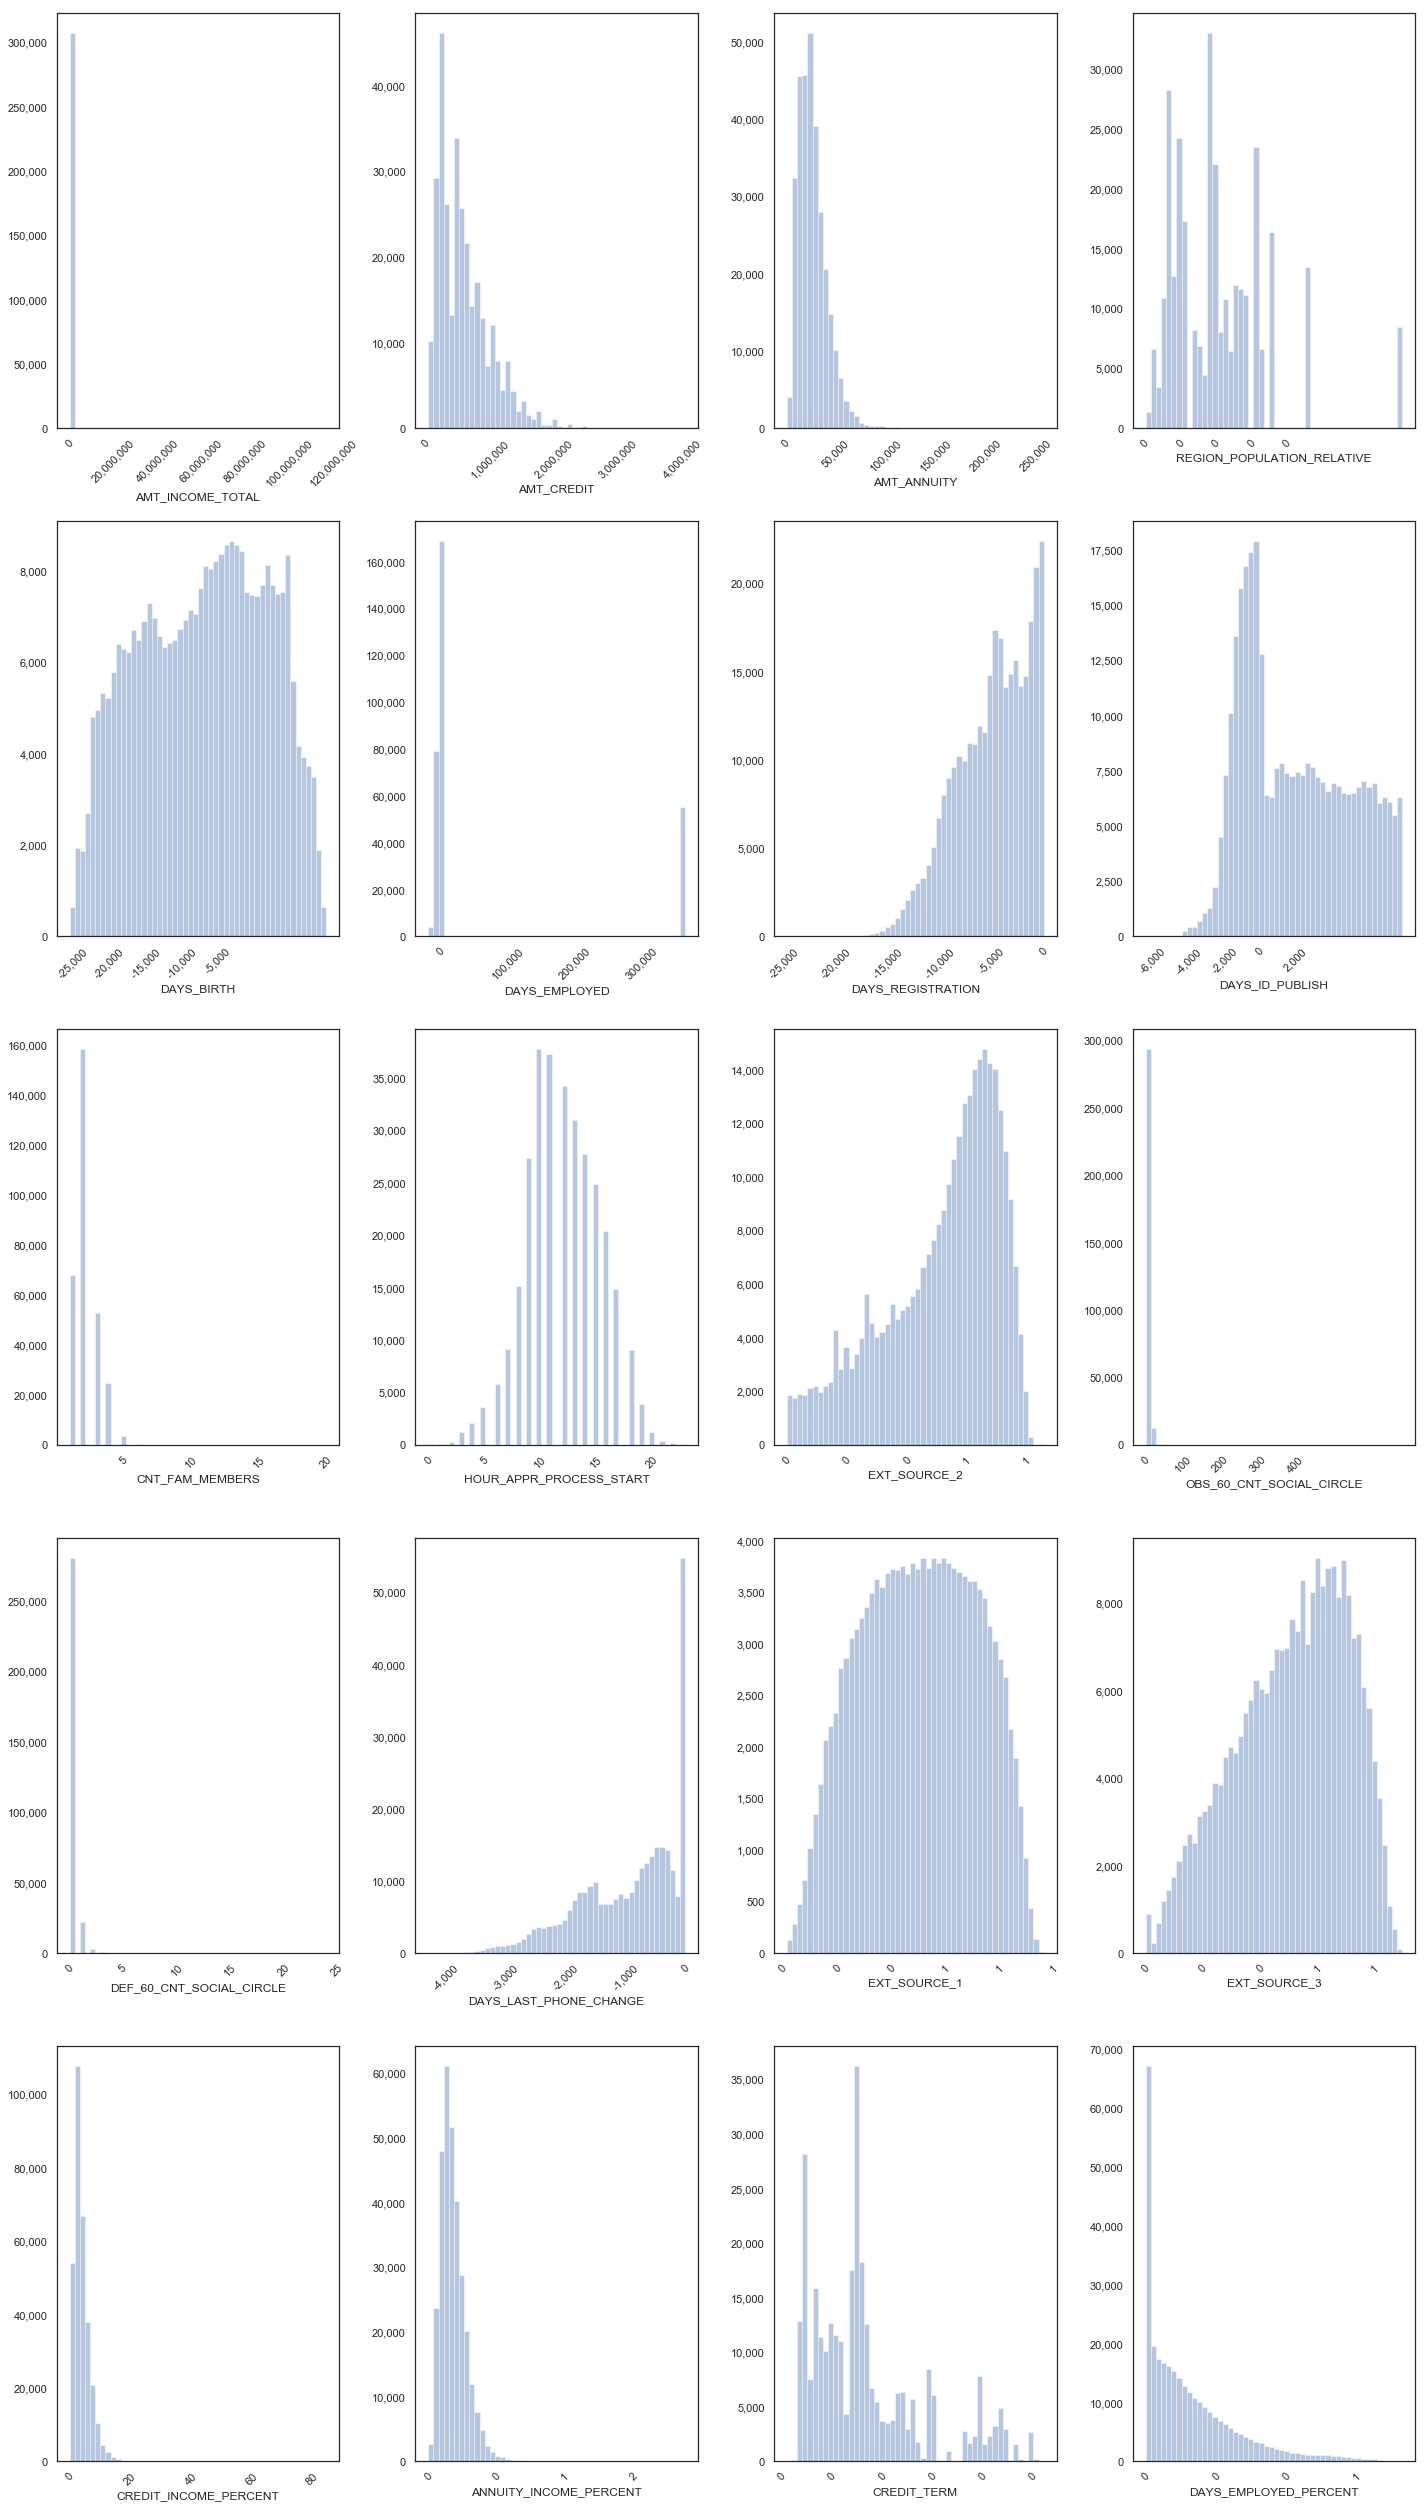

In [13]:
plot_fields = float_table_adjusted.index.values.tolist()+ domain_fields
utils.plot_hist(plot_fields,dataset_train,hist=True)

### 1.8 Fill Missing Values For 'EXT_SOURCE' fields

In [14]:
#let fill in the missing value for EXT_SOURCE fields by using ML predition model

#there are the prediction features
train_fets = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'] 
train_fets += ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']

predict_fields = ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']
for f in predict_fields:
    print("Now predicting missing values for {}.".format(f))
    print("-"*50)
    utils.predict_nan(f,train_fets, dataset_all)
    print("\n")


Now predicting missing values for EXT_SOURCE_1.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[42]	valid_0's l2: 0.0369752
MSE: 0.0370


Now predicting missing values for EXT_SOURCE_2.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[39]	valid_0's l2: 0.0415581
MSE: 0.0416


Now predicting missing values for EXT_SOURCE_3.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[52]	valid_0's l2: 0.0392117
MSE: 0.0392




### 1.9  Create Scaler Object
>  Lets create a `Scaler` object. A `Scaler` object is a helper class for transformating our fields and also to fill any missing values.

In [15]:
#create scaler ojbects  with all fields we want
# fill na with midean value
features =  ['SK_ID_CURR','TARGET','DATASET'] + adjusted_float_list.tolist() + domain_fields
scaler = utils.Scaler(features,dataset_all)
scaler.fillNa()

### 1.9.1  Log Transform Fields 
> Apply log transformation to the following fields:
>> - `AMT_INCOME_TOTAL`
>> - `AMT_CREDIT` 
>> - `AMT_ANNUITY` 
>> - `REGION_POPULATION_RELATIVE`      
>> - `DAYS_EMPLOYED_PERCENT`

In [16]:
log_fields = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED_PERCENT'] #+ \
#  ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']
scaler.trans_log(log_fields)

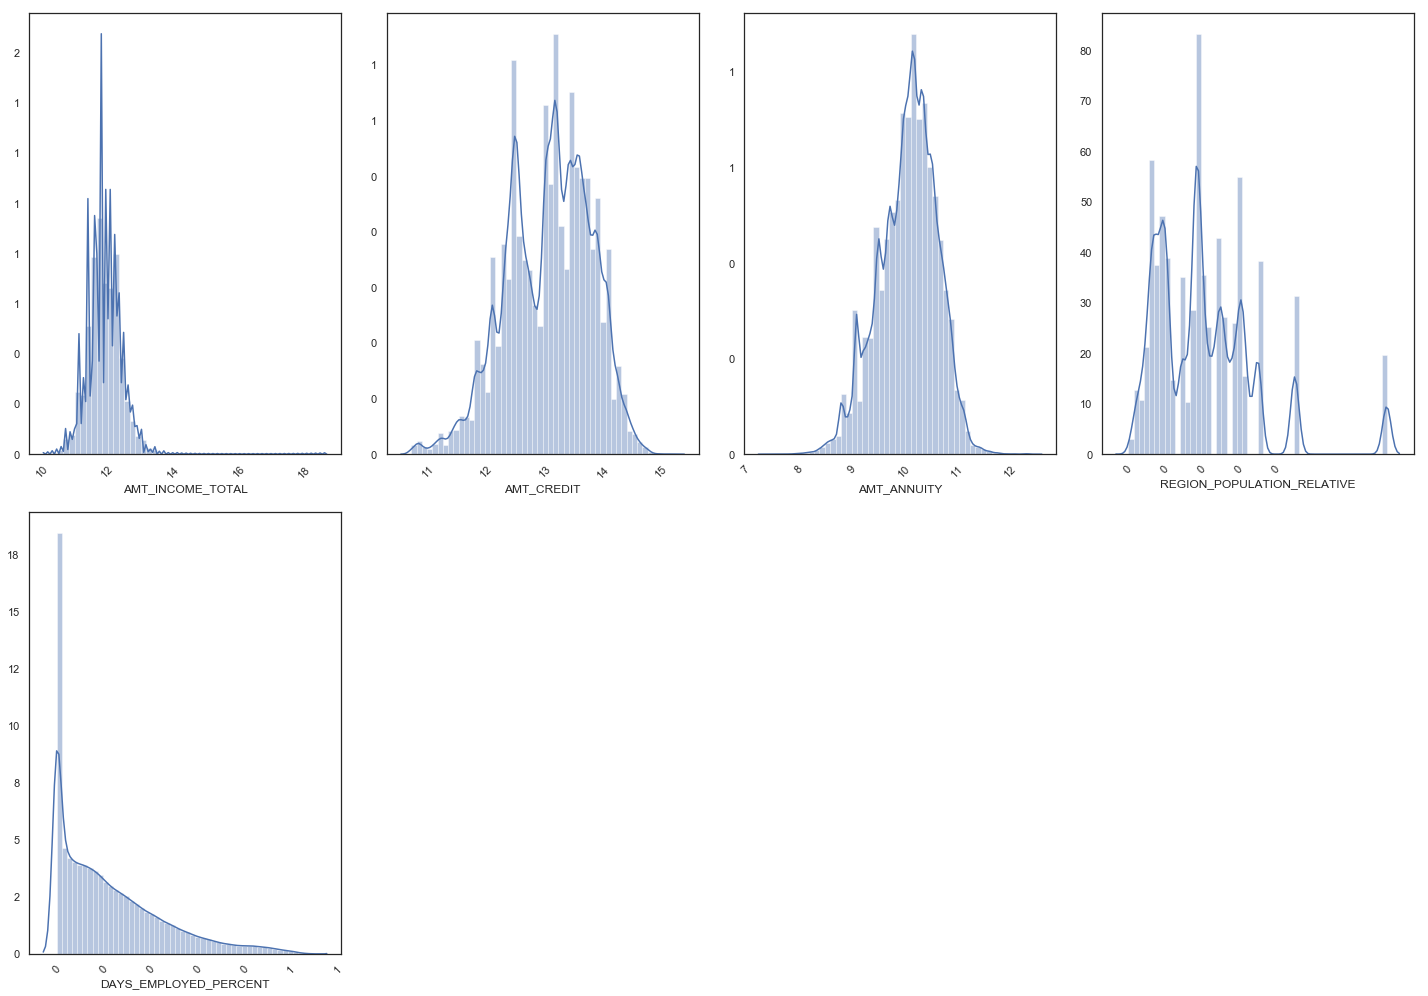

In [17]:
#plot after log transformations
utils.plot_hist(log_fields,scaler.data_train,kde=True)

In [18]:
scaler.data_train[log_fields].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,"307,511.00",11.91,0.49,10.15,11.63,11.90,12.22,18.58
AMT_CREDIT,"307,511.00",13.07,0.72,10.71,12.51,13.15,13.60,15.21
AMT_ANNUITY,"307,511.00",10.07,0.55,7.39,9.71,10.12,10.45,12.46
REGION_POPULATION_RELATIVE,"307,511.00",0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_EMPLOYED_PERCENT,"307,511.00",0.11,0.11,0.00,0.02,0.08,0.17,0.55


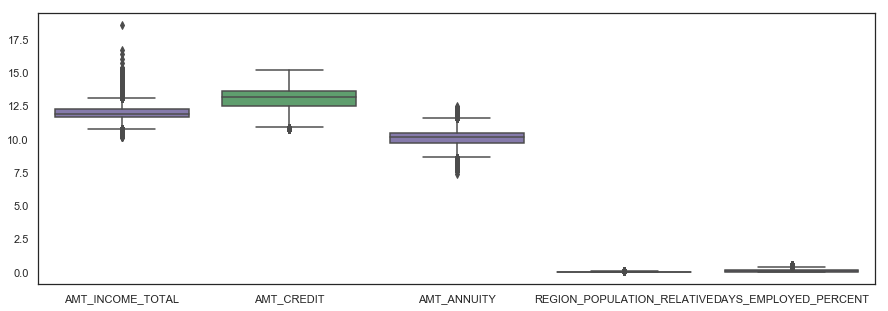

In [19]:
#boxplot to highlight any outliers
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(palette=["m", "g"],data=scaler.data_train[log_fields])
plt.show()

In [20]:
#lets remove outliers using tukey's method using a more conservative step
# to 'AMT_INCOME_TOTAL' and'REGION_POPULATION_RELATIVE'.
# these two fields seem to have ouliers
scaler.remove_outliers(['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE'],step_size=1.7)
scaler.data_train[log_fields].describe().T

AMT_INCOME_TOTAL: Min 10.6315, Max 13.2177
REGION_POPULATION_RELATIVE: Min -0.0212, Max 0.0594


,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,"296,227.00",11.89,0.46,10.63,11.63,11.87,12.22,13.22
AMT_CREDIT,"296,227.00",13.06,0.71,10.71,12.51,13.14,13.60,15.21
AMT_ANNUITY,"296,227.00",10.06,0.54,7.59,9.71,10.11,10.44,12.32
REGION_POPULATION_RELATIVE,"296,227.00",0.02,0.01,0.00,0.01,0.02,0.03,0.05
DAYS_EMPLOYED_PERCENT,"296,227.00",0.11,0.11,0.00,0.02,0.09,0.18,0.55


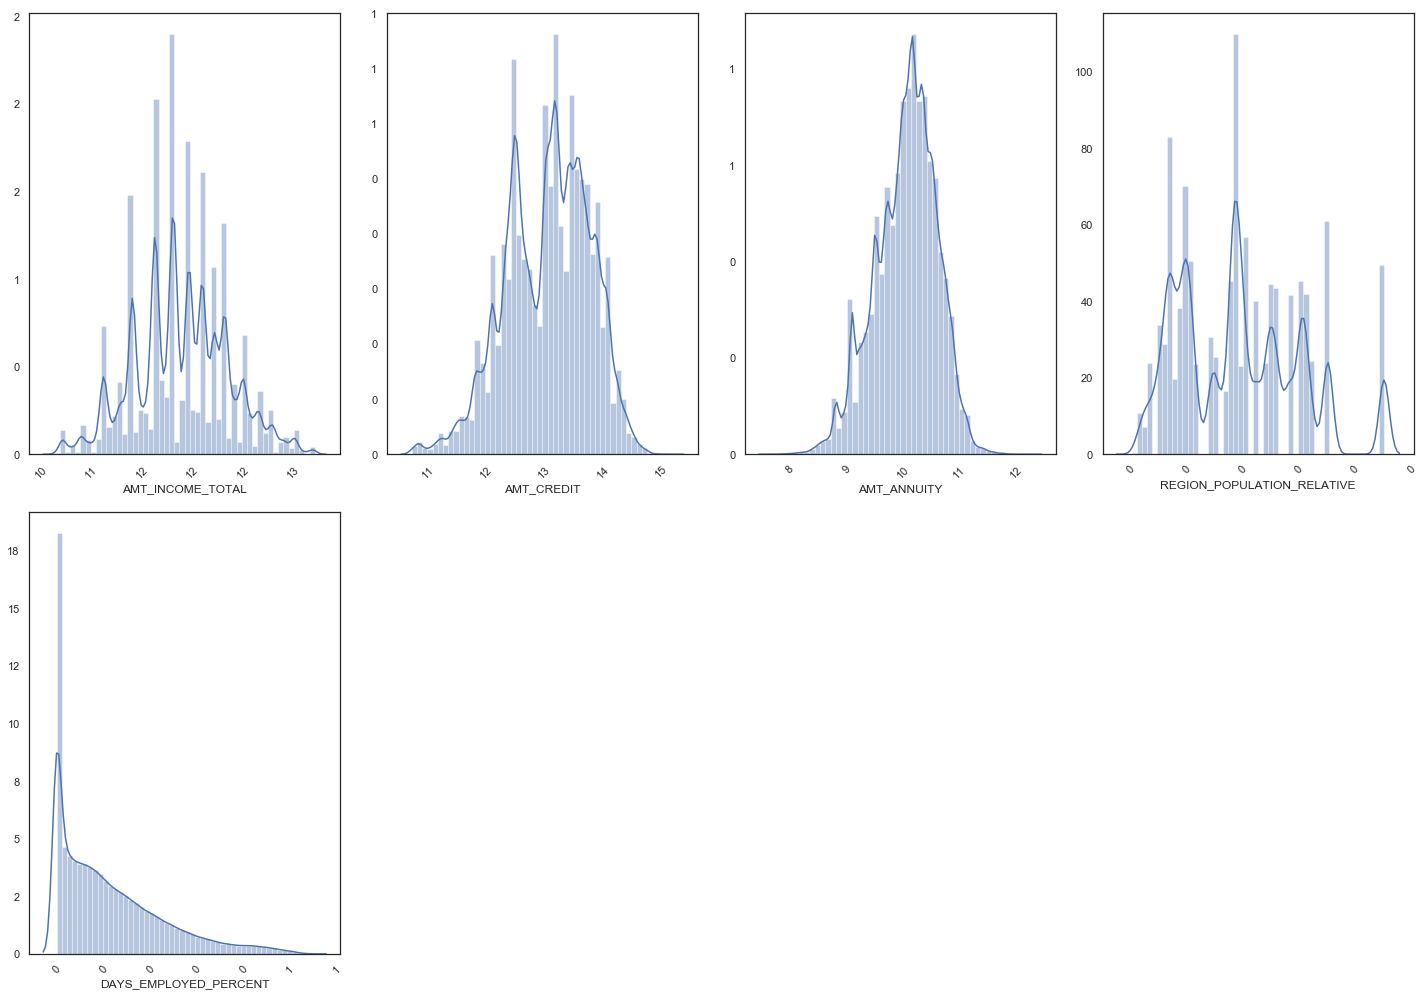

In [21]:
#plot after removing outliers
utils.plot_hist(log_fields,scaler.data_train,kde=True)

### 1.9.2  Transform Field Using Boxcox
>  Apply boxcox transformations to the following fields:
>> - `DAYS_REGISTRATION`
>> - `CREDIT_INCOME_PERCENT`
>> - `ANNUITY_INCOME_PERCENT`
>> - `CREDIT_TERM`

>> The fields `DAYS_REGISTRATION`is  negative because its represent a date prior to the application date.  In order to use boxcox all values must be positive. Since all the values for this field are negative its safe for us to convert it to positive without comprosing data integrity.

In [22]:
#before we apply boxcox we need to make values are positive.
absolute_fields = ['DAYS_REGISTRATION']
scaler.make_positive(absolute_fields)

In [23]:
boxcox_fields = ['DAYS_REGISTRATION'] + \
['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM']
scaler.boxcox(boxcox_fields)

Boxcox complete for DAYS_REGISTRATION
Boxcox complete for CREDIT_INCOME_PERCENT
Boxcox complete for ANNUITY_INCOME_PERCENT
Boxcox complete for CREDIT_TERM


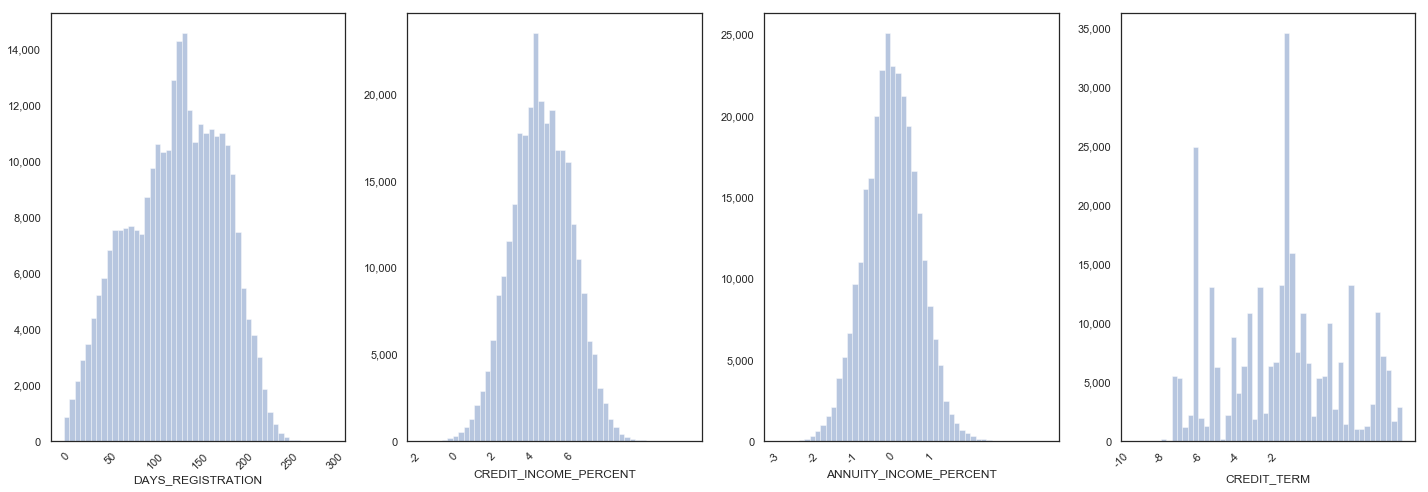

In [24]:
#plot only training dataset
utils.plot_hist(boxcox_fields,scaler.data_train)

### 1.9.3 Categorical Fields  
> The following three fields are int values and are best used as categorical.   We just need to set a maximum value to reduce the number of categories.

>> - `CNT_FAM_MEMBERS`
>> - `OBS_60_CNT_SOCIAL_CIRCLE` 
>> - `DEF_60_CNT_SOCIAL_CIRCLE`

In [25]:
#reduce the number of categories 
def obs_60_cnt(x):
    if x <= 5:
        return x
    else:
        return 6
    
scaler.data['OBS_60_CNT_SOCIAL_CIRCLE'] = scaler.data['OBS_60_CNT_SOCIAL_CIRCLE'].apply(obs_60_cnt) 

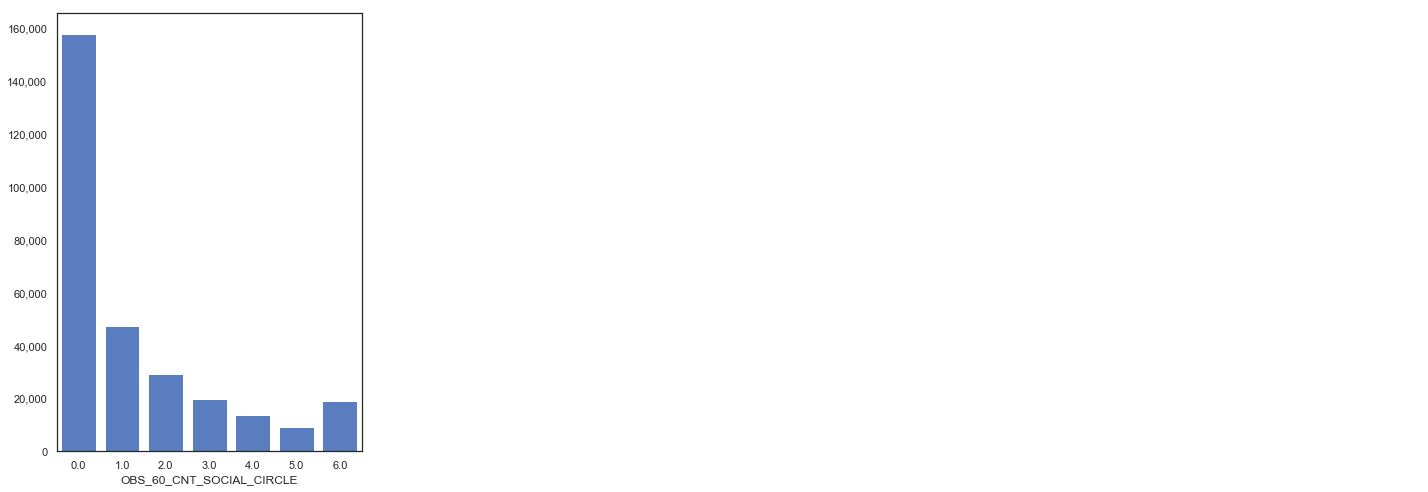

In [26]:
utils.plot_bar(['OBS_60_CNT_SOCIAL_CIRCLE'] ,scaler.data_train)

In [27]:
int_fields = ['CNT_FAM_MEMBERS', 'DEF_60_CNT_SOCIAL_CIRCLE']
scaler.applyMax(int_fields)

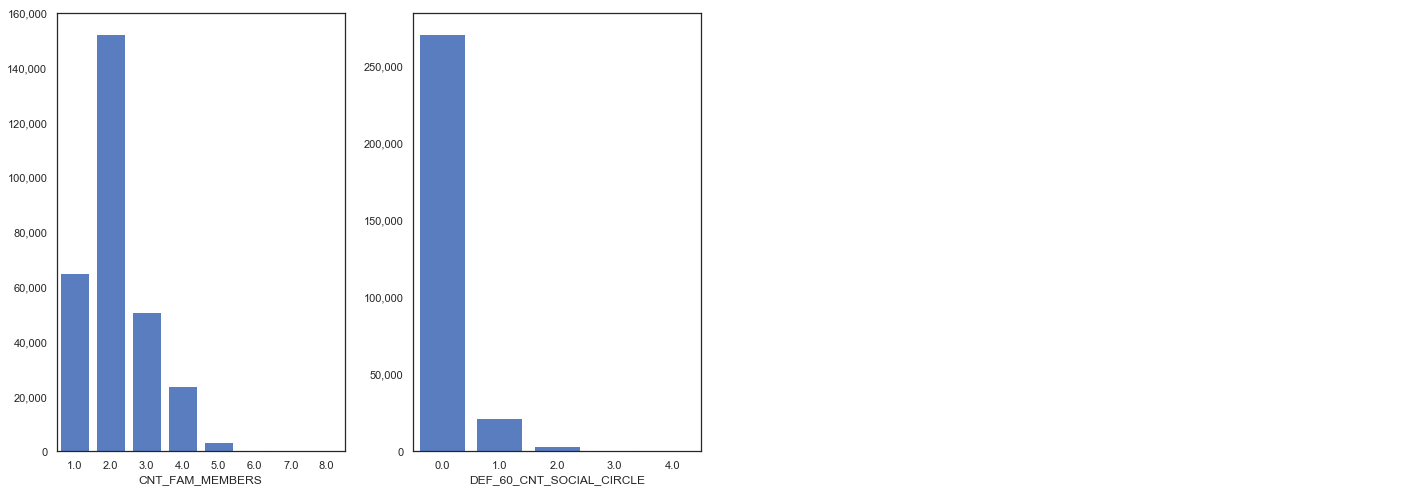

In [28]:
utils.plot_bar(int_fields,scaler.data_train)

### 1.9.4 Transform `DAYS_EMPLOYED`
>  The for some reason the `DAYS_EMPLOYED` field  has all retired applicants as days count value of 365,243.00. I want remove the retired applicants and add them to a new categorical field.

In [29]:
#move retired applicants to categorical field and set their value to 0 in the 'DAYS_EMPLOYED' field.
scaler.data['RETIRED'] = scaler.data['DAYS_EMPLOYED'].apply(lambda x: 1 if x==365243.00 else 0)
scaler.data['DAYS_EMPLOYED'] = scaler.data['DAYS_EMPLOYED'].apply(lambda x: 0 if x==365243.00 else x)

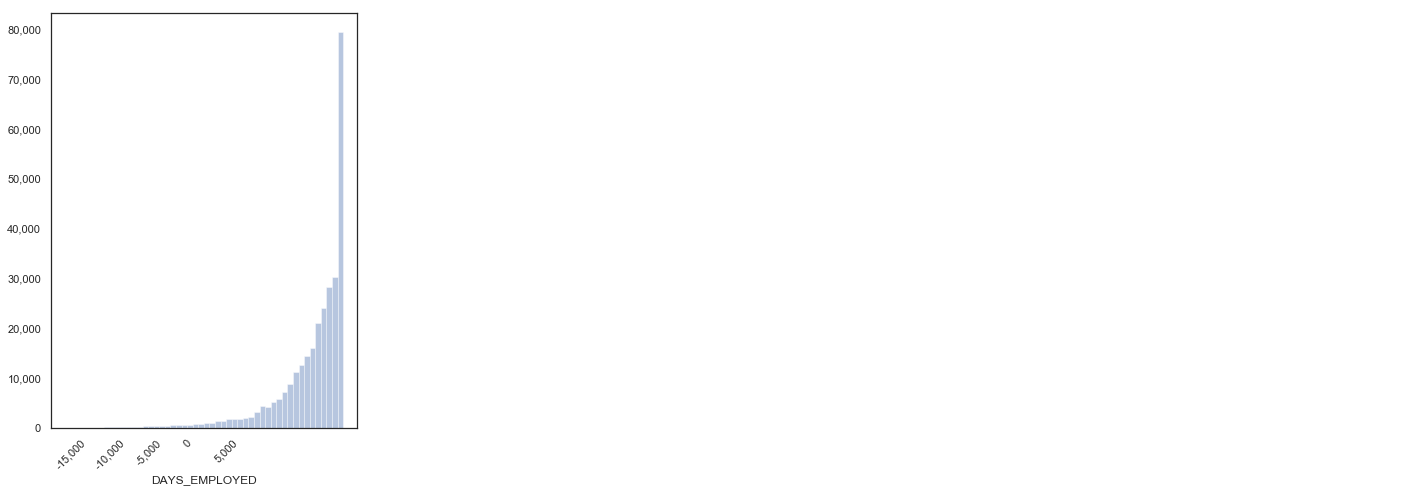

In [30]:
utils.plot_hist(['DAYS_EMPLOYED'],scaler.data_train)

In [31]:
utils.ABT(scaler.data).float_table

,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,1,"344,971.00",0.00,0.00,11.90,0.46,10.20,11.63,11.88,12.22,15.30
AMT_CREDIT,2,"344,971.00",0.00,0.00,13.04,0.71,10.71,12.51,13.12,13.58,15.21
AMT_ANNUITY,3,"344,971.00",0.00,0.00,10.07,0.54,7.59,9.72,10.12,10.45,12.32
REGION_POPULATION_RELATIVE,4,"344,971.00",0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,5,"344,971.00",0.00,0.00,"-16,020.73","4,359.13","-25,201.00","-19,654.00","-15,726.00","-12,402.00","-7,338.00"
DAYS_EMPLOYED,6,"344,971.00",0.00,0.00,"-1,966.96","2,309.37","-17,912.00","-2,784.00","-1,228.00",-296.00,0.00
DAYS_REGISTRATION,7,"344,971.00",0.00,0.00,122.54,51.88,-1.82,83.82,126.46,163.11,296.42
DAYS_ID_PUBLISH,8,"344,971.00",0.00,0.00,"-3,002.73","1,516.64","-7,197.00","-4,317.00","-3,253.00","-1,719.00",0.00
CNT_FAM_MEMBERS,9,"344,971.00",0.00,0.00,2.15,0.91,1.00,2.00,2.00,3.00,8.00
HOUR_APPR_PROCESS_START,10,"344,971.00",0.00,0.00,12.01,3.26,0.00,10.00,12.00,14.00,23.00


### 1.10 Save Final Features To File

In [32]:
#save pre-processed file to csv
scaler.data.to_csv('data_pre_processed/1_1_applications_continuous.csv',index=False)